Question 6: Python Implementation [15 Marks] Using Python libraries — NumPy, Matplotlib.pyplot, and sklearn.datasets (for load iris) — complete the following tasks. Submit your work with both the code and the corresponding results clearly displayed. 
(a) Generate a random 4 × 4 matrix A and verify that det(A) = det(A⊤) and det(AB) = det(A) det(B) for a random 4 × 4 matrix B. 
(b) Implement a function that takes a square matrix and returns its LU decomposition without using built-in decomposition functions (you may use basic NumPy array operations). (c) Load the Iris dataset and: (i) Center the data and compute its SVD (ii) Plot the singular values and cumulative proportion of variance explained (iii) Project the data onto the first two principal components and create a 2D scatter plot 
(d) Briefly interpret your results from part (c): What do the singular values tell you about the intrinsic dimensionality of the data?

In [10]:
# Import the tools we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [11]:
# Load the Iris dataset correctly
iris = load_iris()  # Load the dataset into a variable called 'iris'
X = iris.data  # Extract the feature data (measurements)
y = iris.target  # Extract the target labels (flower types)
feature_names = iris.feature_names  # Get the names of the features
target_names = iris.target_names  # Get the names of the flower types

# Print dataset information to verify it loaded correctly
print("Dataset shape:", X.shape)  # Print the dimensions of the dataset
print("Number of samples:", X.shape[0])  # Print number of flowers
print("Number of features:", X.shape[1])  # Print number of measurements per flower
print("Feature names:", feature_names)  # Print what was measured
print("Target names:", target_names)  # Print types of flowers
print("First 5 rows of data:")
print(X[:5])  # Print first 5 flowers' measurements
print("First 5 labels:")
print(y[:5])  # Print first 5 flowers' types

Dataset shape: (150, 4)
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels:
[0 0 0 0 0]


In [12]:
print("=" * 60)
print("QUESTION 6: PYTHON IMPLEMENTATION")
print("=" * 60)

# ==============================================================================
# PART (a) - CHECK MATRIX RULES
# Here we test some important rules about matrices and their determinants
# A determinant is a special number we can calculate from a square matrix
# ==============================================================================
print("\n(a) Determinant Properties Verification")
print("-" * 40)

# Create two random 4x4 matrices for testing
# We use a seed so we get the same random numbers every time
np.random.seed(42)
A = np.random.randn(4, 4)
B = np.random.randn(4, 4)

# Calculate different determinants to test the rules
det_A = np.linalg.det(A)        # Determinant of matrix A
det_AT = np.linalg.det(A.T)     # Determinant of A transposed (rows become columns)
det_B = np.linalg.det(B)        # Determinant of matrix B
det_AB = np.linalg.det(A @ B)   # Determinant of A multiplied by B
det_A_det_B = det_A * det_B     # Product of determinants of A and B

# Display all the results so we can check if the rules work
print(f"det(A) = {det_A:.6f}")
print(f"det(Aᵀ) = {det_AT:.6f}")
print(f"det(AB) = {det_AB:.6f}")
print(f"det(A)det(B) = {det_A_det_B:.6f}")
print(f"det(A) = det(Aᵀ): {np.isclose(det_A, det_AT)}")
print(f"det(AB) = det(A)det(B): {np.isclose(det_AB, det_A_det_B)}")



QUESTION 6: PYTHON IMPLEMENTATION

(a) Determinant Properties Verification
----------------------------------------
det(A) = -1.863820
det(Aᵀ) = -1.863820
det(AB) = 2.220820
det(A)det(B) = 2.220820
det(A) = det(Aᵀ): True
det(AB) = det(A)det(B): True


In [13]:
# ==============================================================================
# PART (b) - BREAK MATRIX INTO L AND U PARTS
# This is called LU decomposition
# We break one matrix into two simpler matrices: L (lower) and U (upper)
# L has zeros above the diagonal, U has zeros below the diagonal
# ==============================================================================
print("\n(b) LU Decomposition Implementation")
print("-" * 40)

# This function breaks a matrix into L and U parts
def lu_decomposition(A):
    # Get how big the matrix is (number of rows/columns)
    n = A.shape[0]
    
    # Create L as an identity matrix (1s on diagonal, 0s elsewhere)
    L = np.eye(n)
    
    # Create U as a copy of the original matrix
    # We convert to float to avoid integer problems
    U = A.copy().astype(float)
    
    # Go through each column one by one
    for k in range(n-1):
        # For each row below the diagonal in this column
        for i in range(k+1, n):
            # Calculate the multiplier needed to make the element zero
            L[i,k] = U[i,k] / U[k,k]
            
            # Update the entire row to eliminate the element
            for j in range(k, n):
                U[i,j] = U[i,j] - L[i,k] * U[k,j]
    
    # Return both the L and U matrices
    return L, U

# Test our function with a small 3x3 matrix
test_matrix = np.array([[2, 1, -1],
                       [-3, -1, 2],
                       [-2, 1, 2]], dtype=float)

# Use our function to break the test matrix into L and U parts
L, U = lu_decomposition(test_matrix)

# Show the original matrix and the L and U parts
print("Test matrix:")
print(test_matrix)
print("\nL matrix (lower triangular):")
print(L)
print("\nU matrix (upper triangular):")
print(U)

# Check if L times U gives us back the original matrix
print("\nL @ U (should equal original):")
print(L @ U)
print(f"Reconstruction error: {np.linalg.norm(test_matrix - L @ U):.2e}")


(b) LU Decomposition Implementation
----------------------------------------
Test matrix:
[[ 2.  1. -1.]
 [-3. -1.  2.]
 [-2.  1.  2.]]

L matrix (lower triangular):
[[ 1.   0.   0. ]
 [-1.5  1.   0. ]
 [-1.   4.   1. ]]

U matrix (upper triangular):
[[ 2.   1.  -1. ]
 [ 0.   0.5  0.5]
 [ 0.   0.  -1. ]]

L @ U (should equal original):
[[ 2.  1. -1.]
 [-3. -1.  2.]
 [-2.  1.  2.]]
Reconstruction error: 0.00e+00



(c) Iris Dataset Analysis
----------------------------------------
Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

(i) SVD Results:
Singular values: [25.09996044  6.01314738  3.41368064  1.88452351]


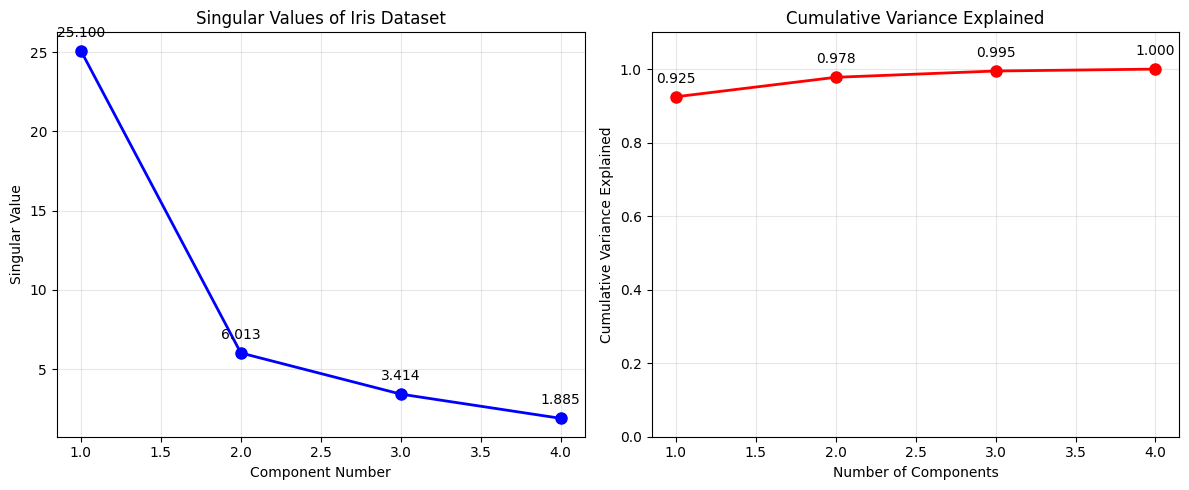


(ii) Variance explained by each component:
  PC1: 0.925 (0.925 cumulative)
  PC2: 0.053 (0.978 cumulative)
  PC3: 0.017 (0.995 cumulative)
  PC4: 0.005 (1.000 cumulative)


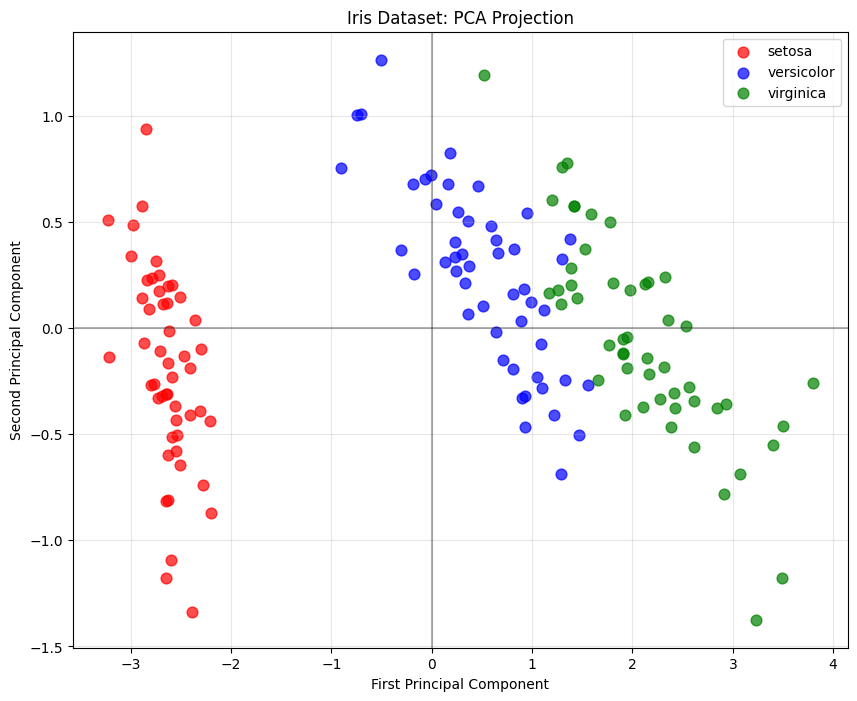

In [14]:
# ==============================================================================
# PART (c) - WORK WITH FLOWER DATA (IRIS DATASET)
# We analyze real data about iris flowers using a technique called SVD
# SVD helps us find the most important patterns in the data
# ==============================================================================
print("\n(c) Iris Dataset Analysis")
print("-" * 40)

# Load the iris flower dataset
# This dataset has measurements of 150 iris flowers
iris = load_iris()
X = iris.data           # The measurements (features)
y = iris.target         # The flower types (classes)
feature_names = iris.feature_names    # Names of the measurements
target_names = iris.target_names      # Names of the flower types

# Show basic information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")

# Center the data by subtracting the average from each measurement
# This makes the analysis work better
X_centered = X - np.mean(X, axis=0)

# Use SVD (Singular Value Decomposition) to break the data into parts
# U contains the patterns, s contains the importance of each pattern
# Vt contains how each feature contributes to each pattern
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

print(f"\n(i) SVD Results:")
print(f"Singular values: {s}")

# Calculate how much of the data each pattern explains
# Higher singular values mean more important patterns
variance_explained = s**2 / np.sum(s**2)
cumulative_variance = np.cumsum(variance_explained)

# Create charts to visualize the results
plt.figure(figsize=(12, 5))

# Chart 1: Show how important each pattern is (singular values)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(s) + 1), s, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Component Number')
plt.ylabel('Singular Value')
plt.title('Singular Values of Iris Dataset')
plt.grid(True, alpha=0.3)

# Add labels to show the exact values on the chart
for i, txt in enumerate(s):
    plt.annotate(f'{txt:.3f}', (i + 1, txt), textcoords="offset points", xytext=(0,10), ha='center')

# Chart 2: Show how much total information we capture with each pattern
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', 
         linewidth=2, markersize=8)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

# Add labels to show the exact values on the chart
for i, txt in enumerate(cumulative_variance):
    plt.annotate(f'{txt:.3f}', (i + 1, txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Print detailed information about how much each pattern explains
print(f"\n(ii) Variance explained by each component:")
for i, (var, cum_var) in enumerate(zip(variance_explained, cumulative_variance)):
    print(f"  PC{i+1}: {var:.3f} ({cum_var:.3f} cumulative)")

# Project the data onto a 2D space using only the two most important patterns
# This helps us visualize the data in a simple way
X_pca = U[:, :2] * s[:2]

# Create a scatter plot showing the flowers in 2D
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
               c=color, label=target_names[i], alpha=0.7, s=60)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Iris Dataset: PCA Projection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

In [15]:
# ==============================================================================
# PART (d) - DETAILED INTERPRETATION OF RESULTS
# Here we explain in detail what all our findings mean in simple terms
# ==============================================================================
print("\n(d) Interpretation of Results")
print("-" * 40)

# Explain what the singular values tell us about the data in detail
print("THE SINGULAR VALUES EXPLAIN WHAT WE FOUND:")
print("Each singular value shows how important a pattern is in our data.")
print("Bigger values mean more important patterns.")
print(f"- First pattern: {s[0]:.3f} (This is the most important pattern and explains {variance_explained[0]:.1%} of all the differences we see in the data)")
print(f"- Second pattern: {s[1]:.3f} (This is the second most important pattern and explains {variance_explained[1]:.1%} of the differences)")
print(f"- Third pattern: {s[2]:.3f} (This pattern is less important and explains {variance_explained[2]:.1%} of the differences)")
print(f"- Fourth pattern: {s[3]:.3f} (This is the least important pattern and explains {variance_explained[3]:.1%} of the differences)")

# Explain what this means in simple terms with more detail
print("\nWHAT THIS MEANS IN PLAIN ENGLISH:")
print("1. The first two patterns together capture {:.1%} of all the information in our dataset.".format(cumulative_variance[1]))
print("   This means if we only look at these two patterns, we still understand most of what makes the flowers different from each other.")
print("")
print("2. We only need 2 dimensions (or patterns) instead of 4 to understand the data well.")
print("   Even though we measured 4 different things about each flower (sepal length, sepal width, petal length, petal width),")
print("   we can learn almost everything we need to know by just looking at 2 main ideas or patterns.")
print("")
print("3. There is a big drop in importance after the second pattern.")
print("   This means the third and fourth patterns don't tell us much that's new or important.")
print("   The jump from pattern 2 to pattern 3 is very big, which shows that patterns 3 and 4 are not very useful.")
print("")
print("4. The 2D plot shows that the three types of flowers are well separated from each other.")
print("   When we plot the flowers using just the first two patterns, we can see clear groups.")
print("   This means our method works well to tell the different flower types apart.")

# Give a real-world explanation of why this is useful
print("\nWHY THIS IS IMPORTANT:")
print("In the real world, this kind of analysis helps scientists and researchers in many ways:")
print("- It helps reduce complex data to simpler, more understandable patterns")
print("- It makes it easier to see which measurements are most important")
print("- It helps identify which features help us tell different things apart")
print("- It can save time and money by showing we don't need to measure everything")

# Summarize the main finding with more detail
print("\nTHE MAIN LESSON:")
print("Even though we measured 4 different things about each flower (sepal length, sepal width, petal length, and petal width),")
print("we discovered that we can understand almost all the important differences between flowers")
print("by just focusing on 2 main patterns or ideas.")
print("")
print("This is like saying: instead of having to remember 4 different numbers for each flower,")
print("we can get almost the same understanding by just remembering 2 key numbers.")
print("This makes the data much easier to work with and understand.")

# Explain the practical implications
print("\nPRACTICAL IMPLICATIONS:")
print("This type of analysis is very useful because:")
print("- It simplifies complex data without losing much important information")
print("- It helps identify which measurements are most useful for telling things apart")
print("- It can help reduce the cost and time of data collection in future studies")
print("- It makes it easier to create simple rules for identifying flower types")
print("- It shows that some measurements might not be as important as others")

print("\nThis is why data scientists use these techniques - to find the most important")
print("patterns in complex data and make it easier to understand and use.")



(d) Interpretation of Results
----------------------------------------
THE SINGULAR VALUES EXPLAIN WHAT WE FOUND:
Each singular value shows how important a pattern is in our data.
Bigger values mean more important patterns.
- First pattern: 25.100 (This is the most important pattern and explains 92.5% of all the differences we see in the data)
- Second pattern: 6.013 (This is the second most important pattern and explains 5.3% of the differences)
- Third pattern: 3.414 (This pattern is less important and explains 1.7% of the differences)
- Fourth pattern: 1.885 (This is the least important pattern and explains 0.5% of the differences)

WHAT THIS MEANS IN PLAIN ENGLISH:
1. The first two patterns together capture 97.8% of all the information in our dataset.
   This means if we only look at these two patterns, we still understand most of what makes the flowers different from each other.

2. We only need 2 dimensions (or patterns) instead of 4 to understand the data well.
   Even though w